In [ ]:
#@markdown # Hidupkan mesin AI
#@markdown Mohon tunggu beberapa saat
from IPython.utils import capture
print('[1;31mMohon tunggu beberapa saat')
print('[1;31mMenghidupkan Mesin')

with capture.capture_output() as cap:
  !mkdir hasil_gambar
  !pip install transformers scipy ftfy accelerate
  !pip install git+https://github.com/huggingface/diffusers.git
  !wget https://civitai.com/api/download/models/28907 --content-disposition
  !pip install translators

  import cv2
  import numpy as np
  import ipywidgets as widgets
  from IPython.display import clear_output
  import torch
  from diffusers import StableDiffusionPipeline
  import translators as ts
  def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
  pipe = StableDiffusionPipeline.from_pretrained("AIBatikBakaran/batik_model_final", torch_dtype=torch.float16, use_safetensors=True)
  # pipe.unet.load_attn_procs('/content/animeoutlineV4_16.safetensors')
  pipe.load_lora_weights('/content/animeoutlineV4_16.safetensors')
  pipe = pipe.to("cuda")

  import torch

  from PIL import Image, ImageOps

  def image_grid(imgs, rows, cols):
      # assert len(imgs) == rows*cols
      border = 10
      w, h = imgs[0].size
      grid = Image.new('RGB', size=(cols*(w+2*border), rows*(h+2*border)))
      grid_w, grid_h = grid.size

      for i, img in enumerate(imgs):
          grid.paste(ImageOps.expand(img, border=border, fill='black'), box=(i%cols*(w+2*border), i//cols*(h+2*border)))
      return grid


def convert2png(img, filename):
  np_img = np.array(img)
  np_img_gray = cv2.cvtColor(np_img, cv2.COLOR_RGB2GRAY)
  _,np_img_gray = cv2.threshold(np_img_gray,100,255,cv2.THRESH_BINARY)
  np_img_bgra = cv2.cvtColor(np_img_gray, cv2.COLOR_GRAY2BGRA)
  np_img_bgra = np.transpose(np_img_bgra, axes=(2,0,1))
  alpha = np.array([[0 if white else 255 for white in row] for row in np_img_gray[:, :] > 128])

  # np_img_bgra = np.vstack([np.expand_dims(np_img_gray, axis=0),np.expand_dims(np_img_gray, axis=0),np.expand_dims(np_img_gray, axis=0),np.expand_dims(np_img_gray, axis=0)])
  np_img_bgra[3] = alpha

  np_img_bgra = np.transpose(np_img_bgra, axes=(1,2,0))
  resized = cv2.resize(np_img_bgra, (2048,2048), interpolation=cv2.INTER_CUBIC)

  cv2.imwrite(f"hasil_gambar/{filename}_{np.random.rand()}.png", resized)

clear_output()
inf('\u2714 Mesin siap dijalankan','success', '700px')

Button(button_style='success', description='✔ Mesin siap dijalankan', disabled=True, layout=Layout(min_width='…

  0%|          | 0/50 [00:00<?, ?it/s]

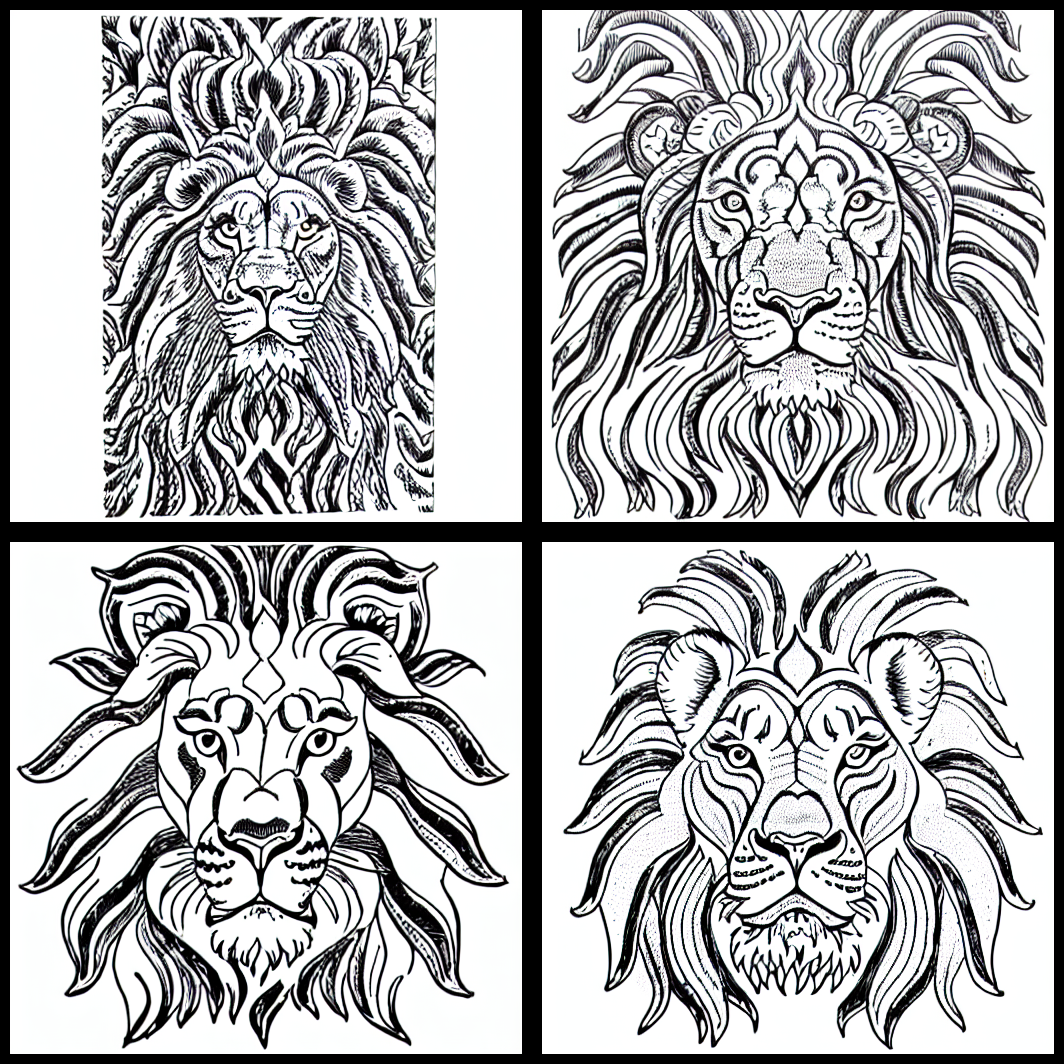

In [ ]:
# @markdown # Membuat Ceplok Batik
jumlah_gambar = 4 # @param {type:"slider", min:1, max:8, step:1}
generator = [torch.Generator(device="cuda").manual_seed(np.random.randint(10000000)) for i in range(jumlah_gambar)]

# perekaman perintah untuk dijadikan pola batik
perintah = "singa" # @param {type:"string"}

# perintah di-translate untuk menjadi bahasa inggris
perintah_ts = ts.translate_text(perintah, from_language="id", to_language="en")

# ditambahkan perintah untuk pattern/style
perintah_edit = "batik bakaran, "+perintah+", "+perintah_ts+", ornate, (empty background), (lineart), (no crop), (monochrome), <lora:animeoutlineV4_16:1>"
perintah_edit = [perintah_edit] * jumlah_gambar

# negative prompt
neg_prompt = ["anime, human, anime_girl, crop"] * jumlah_gambar

pipe.safety_checker = None

# Generate image menggunakan SD 1.4
images = pipe(
    perintah_edit,
    num_inference_steps=50,
    generator=generator,
    negative_prompt=neg_prompt).images

for i in range(jumlah_gambar):
  convert2png(images[i], perintah)

# tampilkan dalam bentuk grid
grid = image_grid(images, rows=jumlah_gambar // 2 + jumlah_gambar % 2, cols=2)
grid

In [ ]:
#@markdown # Unduh hasil gambar yang dibuat
!zip -r hasil_gambar.zip hasil_gambar
from google.colab import files
files.download('hasil_gambar.zip')

  adding: hasil_gambar/ (stored 0%)
  adding: hasil_gambar/keong dan rumput laut_0.5527887724492471.png (deflated 27%)
  adding: hasil_gambar/bunga rawa_0.9852112323274913.png (deflated 26%)
  adding: hasil_gambar/1 kodok di atas bunga teratai_0.8859560047754534.png (deflated 27%)
  adding: hasil_gambar/keong dan rumput laut_0.2831920251266733.png (deflated 27%)
  adding: hasil_gambar/keong dan rumput laut_0.14470180265867316.png (deflated 28%)
  adding: hasil_gambar/udang dan laut_0.9517187421898416.png (deflated 30%)
  adding: hasil_gambar/1 kodok di atas bunga teratai_0.9574976619099679.png (deflated 31%)
  adding: hasil_gambar/beruang mengambil madu_0.2800761039529588.png (deflated 25%)
  adding: hasil_gambar/1 katak di atas bunga teratai_0.19780934790764104.png (deflated 27%)
  adding: hasil_gambar/1 katak di atas bunga teratai_0.4904799441639879.png (deflated 29%)
  adding: hasil_gambar/udang dan laut_0.38696548126536756.png (deflated 29%)
  adding: hasil_gambar/bunga rawa_0.4397

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>